In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



# importing the dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/machine/weatherHistory.csv")
print(data)

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

#Here I have plotted the date to check there is no skip in the time

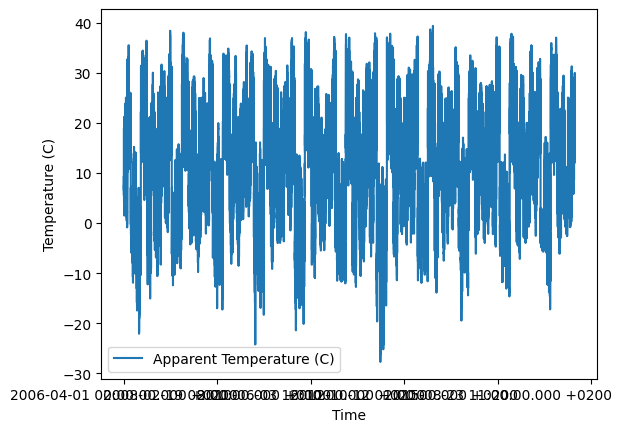

In [ ]:
data.plot(kind = 'line', x = 'Formatted Date', y = 'Apparent Temperature (C)',xlabel='Time',ylabel='Temperature (C)',)
plt.show()

# Select only the numerical features
# and Define the feature matrix and target vector
I have choose the Apparent Temperature (C) to be the target because the humidity,wind speed and pressure affect on there values




In [ ]:
feutures_map=data.drop(columns=['Formatted Date','Precip Type','Summary','Daily Summary','Loud Cover','Visibility (km)','Wind Bearing (degrees)','Temperature (C)','Apparent Temperature (C)'])
target_map=data.drop(columns=['Formatted Date','Precip Type','Summary','Daily Summary','Loud Cover','Visibility (km)','Wind Bearing (degrees)','Humidity','Wind Speed (km/h)','Pressure (millibars)',"Temperature (C)"])

X = feutures_map
print(X)
y = target_map
print(y)


       Humidity  Wind Speed (km/h)  Pressure (millibars)
0          0.89            14.1197               1015.13
1          0.86            14.2646               1015.63
2          0.89             3.9284               1015.94
3          0.83            14.1036               1016.41
4          0.83            11.0446               1016.51
...         ...                ...                   ...
96448      0.43            10.9963               1014.36
96449      0.48            10.0947               1015.16
96450      0.56             8.9838               1015.66
96451      0.60            10.5294               1015.95
96452      0.61             5.8765               1016.16

[96453 rows x 3 columns]
       Apparent Temperature (C)
0                      7.388889
1                      7.227778
2                      9.377778
3                      5.944444
4                      6.977778
...                         ...
96448                 26.016667
96449                 24.583333
96

#Next step we choose the best model based on lowest mean squared error(MSE) and highest R-squared

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best model based on MSE is Gradient Boosting with an MSE of 48.059802189218885.
The best model based on R-squared is Gradient Boosting with an R-squared of 0.584612726139353.


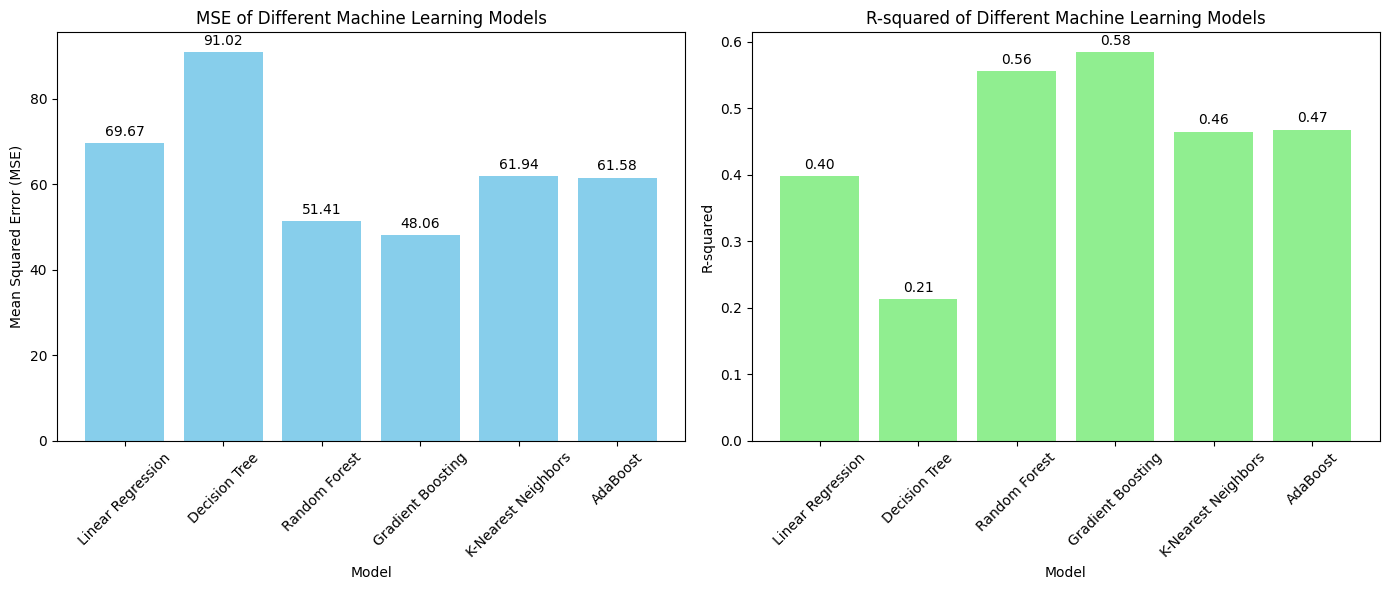

In [ ]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

# Train the models and evaluate them
mse_results = {}
r2_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_results[model_name] = mse
    r2_results[model_name] = r2

# Determine the best model based on MSE
best_model_mse_name = min(mse_results, key=mse_results.get)
best_model_mse = mse_results[best_model_mse_name]

# Determine the best model based on R-squared
best_model_r2_name = max(r2_results, key=r2_results.get)
best_model_r2 = r2_results[best_model_r2_name]

print(f"The best model based on MSE is {best_model_mse_name} with an MSE of {best_model_mse}.")
print(f"The best model based on R-squared is {best_model_r2_name} with an R-squared of {best_model_r2}.")

# Plot the results
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
bars_mse = plt.bar(mse_results.keys(), mse_results.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Different Machine Learning Models')
plt.xticks(rotation=45)

# Annotate MSE values
for bar in bars_mse:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Plot R-squared
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(r2_results.keys(), r2_results.values(), color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared of Different Machine Learning Models')
plt.xticks(rotation=45)

# Annotate R-squared values
for bar in bars_r2:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Applying Gradient Boosting model to the dataset

In [ ]:

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for both types of data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Step 3: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
from sklearn.ensemble import GradientBoostingRegressor

# Create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 48.0540331322115
R-squared: 0.5846625888677432


# Plotting predicted vs. true values



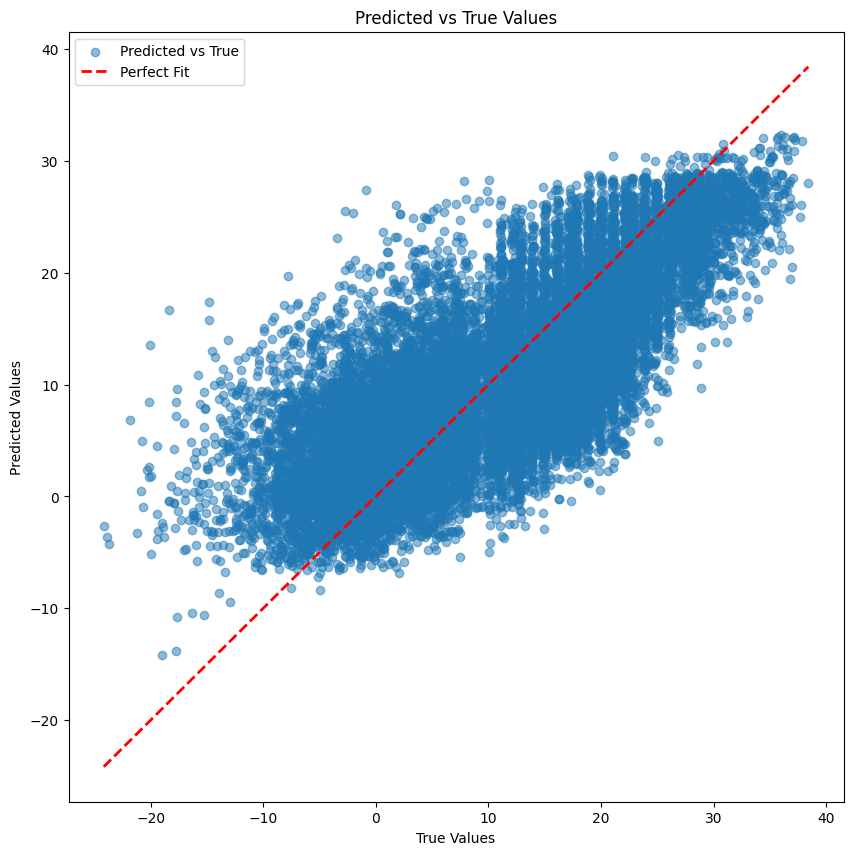

In [ ]:
# Plotting predicted vs. true values
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()
plt.show()